# Open Raw data to start cleaning and preprocessing.

previously we created a jupyter notebook containing all the preprocessing and the cleaning. I created a new notebook that lets me preprocess the data and understand why we selected the features for the model. 

I also wanted to explain fully where this process comes from and the steps that took to understand it properly. 


In [2]:
import pandas as pd

In [22]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [23]:
# We identify the shape of the data matrix and assing those values to the tupple feature and sample. 
n_samples, n_features = df.shape
print("number of samples: ",n_samples)
print("number of features: ", n_features)

number of samples:  6991
number of features:  41


Created a in64 column with the numerical values of the target column.
* FALSE POSITIVE: 0 
* CONFIRMED:      1
* CANDIDATE:      2

In [24]:

df["int_koi_disposition"]= df['koi_disposition']
# created a dictionary to replace the strings for integer
cleanup_disposition = {'int_koi_disposition':{'FALSE POSITIVE': int(0) , 'CONFIRMED': int(1), 'CANDIDATE':int(2) }}
df.replace(cleanup_disposition, inplace= True)


In [25]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [26]:
df['int_koi_disposition'].value_counts()

0    3504
1    1800
2    1687
Name: int_koi_disposition, dtype: int64

In [27]:
df_names = df.copy()
df_names = df_names['koi_disposition']
df = df.drop(['koi_disposition'],axis = 1)
df_names

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002576F53E288>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

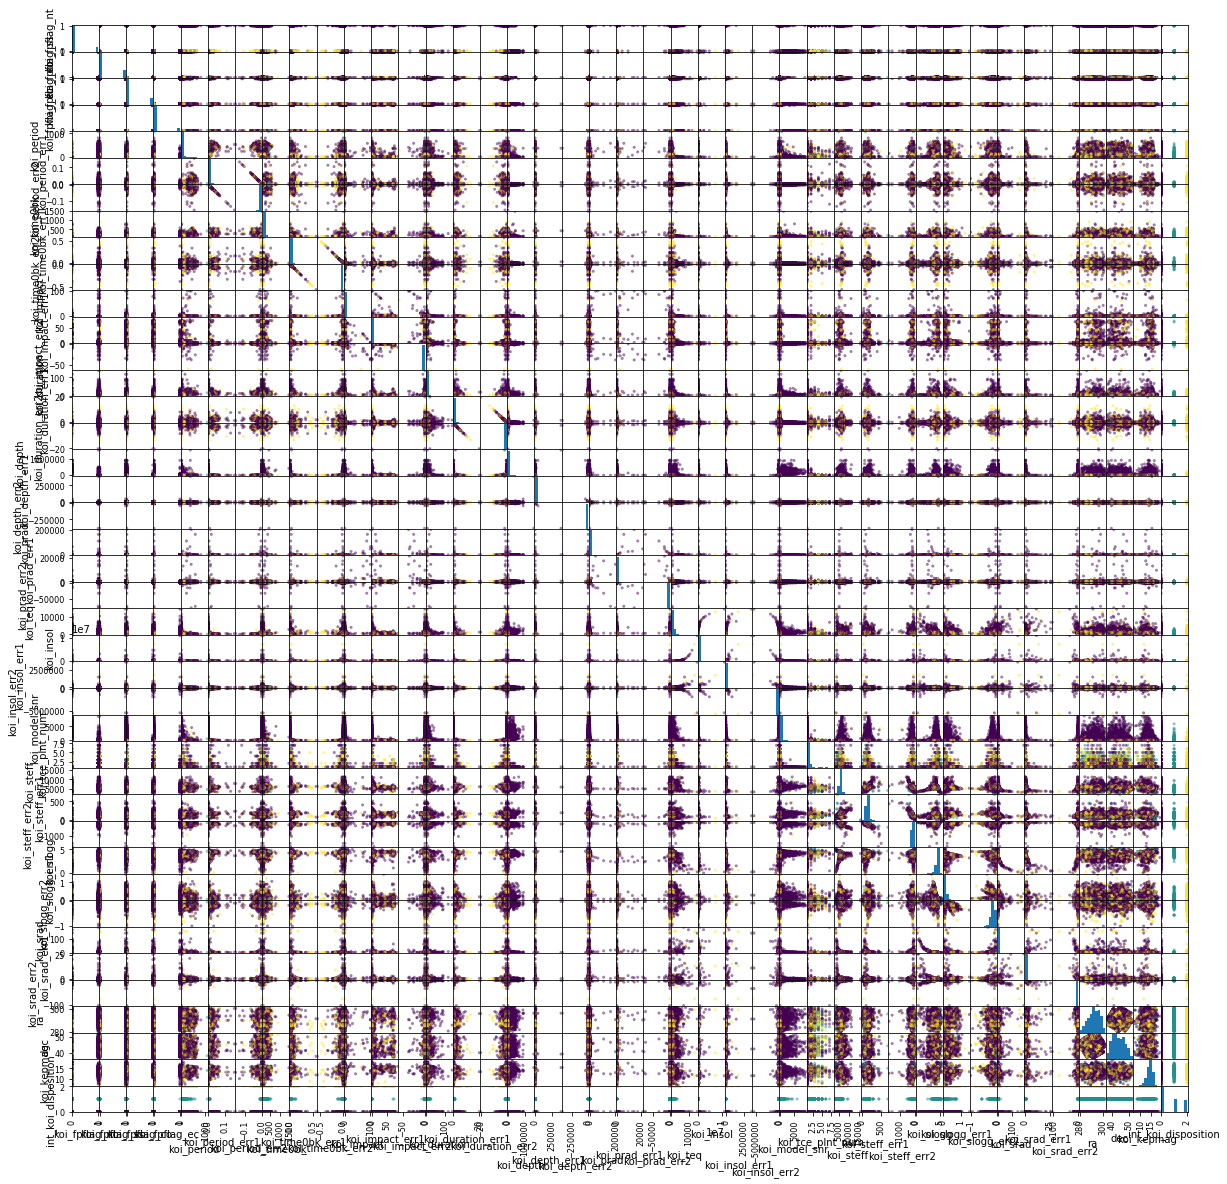

In [29]:
# pd.plotting.scatter_matrix(df, c=df['int_koi_disposition'], figsize=(20,20))

# Balancing the dataset


In [40]:
# we are going balance the dataset to have the same number of categries as they have in the value_counts()
num_of_targets = 1687

indices_to_remove = []
for row in df:
    print(row)
    

297.00482

In [56]:
from imblearn.under_sampling import NearMiss
X = df.iloc[:,:40]
y = df.iloc[:,40]
nm = NearMiss()
X_res, y_res = nm.fit_sample(X,y)

In [61]:
X_res

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,1,1,0,11.413214,0.000134,-0.000134,140.119880,0.008260,-0.008260,...,-203,4.330,0.128,-0.192,1.155,0.363,-0.195,296.27393,44.010441,13.746
1,0,1,1,0,7.126847,0.000056,-0.000056,137.428070,0.006730,-0.006730,...,-182,4.525,0.044,-0.176,0.896,0.231,-0.082,285.98483,43.090912,14.800
2,1,0,0,0,11.928319,0.000320,-0.000320,142.127000,0.023000,-0.023000,...,-151,4.545,0.071,-0.052,0.750,0.071,-0.079,290.64545,44.904202,15.577
3,0,0,1,0,13.655096,0.000151,-0.000151,137.526510,0.007420,-0.007420,...,-198,4.487,0.054,-0.216,0.962,0.315,-0.105,296.61996,48.905800,14.818
4,0,1,1,1,25.955404,0.000591,-0.000591,148.798900,0.021400,-0.021400,...,-180,4.408,0.087,-0.203,1.038,0.323,-0.139,293.72696,39.036800,14.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,0,0,0,0,4.736816,0.000147,-0.000147,131.787600,0.025600,-0.025600,...,-201,4.456,0.056,-0.224,1.011,0.329,-0.110,289.20331,44.505138,13.922
5057,0,0,0,0,130.235324,0.003030,-0.003030,218.271900,0.020100,-0.020100,...,-183,4.529,0.036,-0.192,0.903,0.251,-0.084,289.57452,44.519939,15.991
5058,0,0,0,0,8.870416,0.000009,-0.000009,137.481093,0.000869,-0.000869,...,-181,4.027,0.434,-0.186,1.514,0.426,-0.640,290.14914,50.239178,13.579
5059,0,0,0,0,47.109631,0.000194,-0.000194,144.131720,0.003430,-0.003430,...,-159,3.597,0.968,-0.242,2.780,1.089,-2.022,296.15601,44.920090,13.731
